In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

In [34]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
#cargo primero los datos
file_dir = 'Datos/RiesgoCABACABANA'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [45]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [97]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True,input_shape=(lag,1)))
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True))
model.add(keras.layers.LSTM(units=100,activation='relu'))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8,verbose=2)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_66 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_67 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________
Train on 244 samples, validate on 58 samples
Epoch 1/500
 - 1s - loss: 0.2052 - val_loss: 0.0294
Epoch 2/500
 - 0s - loss: 0.0266 - val_loss: 0.0031
Epoch 3/500
 - 0s - loss: 0.0026 - val_loss: 0.0024
Epoch 4/500
 - 0s - loss: 6.1978e-04 - val_l

 - 0s - loss: 1.0253e-04 - val_loss: 0.0053
Epoch 129/500
 - 0s - loss: 1.4466e-04 - val_loss: 0.0023
Epoch 130/500
 - 0s - loss: 1.5086e-04 - val_loss: 0.0027
Epoch 131/500
 - 0s - loss: 2.0207e-04 - val_loss: 0.0036
Epoch 132/500
 - 0s - loss: 2.7620e-04 - val_loss: 0.0031
Epoch 133/500
 - 0s - loss: 1.9308e-04 - val_loss: 0.0013
Epoch 134/500
 - 0s - loss: 1.7134e-04 - val_loss: 0.0050
Epoch 135/500
 - 0s - loss: 3.1708e-04 - val_loss: 0.0043
Epoch 136/500
 - 0s - loss: 1.3213e-04 - val_loss: 0.0039
Epoch 137/500
 - 0s - loss: 1.7361e-04 - val_loss: 0.0039
Epoch 138/500
 - 0s - loss: 2.3950e-04 - val_loss: 6.2603e-04
Epoch 139/500
 - 0s - loss: 6.4874e-04 - val_loss: 0.0013
Epoch 140/500
 - 0s - loss: 1.8741e-04 - val_loss: 0.0030
Epoch 141/500
 - 0s - loss: 1.3856e-04 - val_loss: 0.0046
Epoch 142/500
 - 0s - loss: 2.0290e-04 - val_loss: 0.0020
Epoch 143/500
 - 0s - loss: 1.1167e-04 - val_loss: 0.0055
Epoch 144/500
 - 0s - loss: 1.9188e-04 - val_loss: 0.0035
Epoch 145/500
 - 0s - lo

Epoch 270/500
 - 1s - loss: 1.0895e-04 - val_loss: 0.0027
Epoch 271/500
 - 1s - loss: 9.4528e-05 - val_loss: 0.0032
Epoch 272/500
 - 0s - loss: 1.4064e-04 - val_loss: 0.0021
Epoch 273/500
 - 1s - loss: 1.4357e-04 - val_loss: 0.0021
Epoch 274/500
 - 1s - loss: 1.2406e-04 - val_loss: 0.0026
Epoch 275/500
 - 1s - loss: 1.2621e-04 - val_loss: 0.0030
Epoch 276/500
 - 1s - loss: 8.5971e-05 - val_loss: 0.0017
Epoch 277/500
 - 0s - loss: 2.3855e-04 - val_loss: 0.0018
Epoch 278/500
 - 1s - loss: 1.7199e-04 - val_loss: 0.0037
Epoch 279/500
 - 1s - loss: 1.0813e-04 - val_loss: 0.0044
Epoch 280/500
 - 0s - loss: 1.8743e-04 - val_loss: 0.0025
Epoch 281/500
 - 1s - loss: 1.1956e-04 - val_loss: 0.0016
Epoch 282/500
 - 0s - loss: 1.0487e-04 - val_loss: 0.0014
Epoch 283/500
 - 1s - loss: 1.6086e-04 - val_loss: 0.0021
Epoch 284/500
 - 1s - loss: 8.9501e-05 - val_loss: 0.0015
Epoch 285/500
 - 1s - loss: 1.6636e-04 - val_loss: 0.0024
Epoch 286/500
 - 0s - loss: 1.4452e-04 - val_loss: 0.0024
Epoch 287/500


Epoch 411/500
 - 1s - loss: 5.6185e-05 - val_loss: 0.0027
Epoch 412/500
 - 1s - loss: 7.4309e-05 - val_loss: 0.0023
Epoch 413/500
 - 1s - loss: 5.8360e-05 - val_loss: 0.0015
Epoch 414/500
 - 0s - loss: 1.1787e-04 - val_loss: 0.0034
Epoch 415/500
 - 0s - loss: 9.0792e-05 - val_loss: 0.0024
Epoch 416/500
 - 0s - loss: 1.2043e-04 - val_loss: 0.0032
Epoch 417/500
 - 0s - loss: 9.0569e-05 - val_loss: 0.0018
Epoch 418/500
 - 0s - loss: 6.4514e-05 - val_loss: 0.0024
Epoch 419/500
 - 0s - loss: 7.3253e-05 - val_loss: 0.0019
Epoch 420/500
 - 1s - loss: 2.0860e-04 - val_loss: 0.0031
Epoch 421/500
 - 1s - loss: 1.1703e-04 - val_loss: 0.0019
Epoch 422/500
 - 1s - loss: 5.9282e-05 - val_loss: 0.0022
Epoch 423/500
 - 1s - loss: 7.2146e-05 - val_loss: 0.0012
Epoch 424/500
 - 0s - loss: 8.1834e-05 - val_loss: 0.0024
Epoch 425/500
 - 1s - loss: 6.3795e-05 - val_loss: 0.0031
Epoch 426/500
 - 0s - loss: 1.0690e-04 - val_loss: 0.0029
Epoch 427/500
 - 0s - loss: 1.0465e-04 - val_loss: 0.0014
Epoch 428/500


In [98]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [99]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [100]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict))) #bs 1 295 bs 10 293
print('test mse squared:',np.sqrt(mean_squared_error(ytest,test_predict))) #bs 1 342 bs 10 348

train mse squared: 297.0470559433152
test mse squared: 347.4098407186105


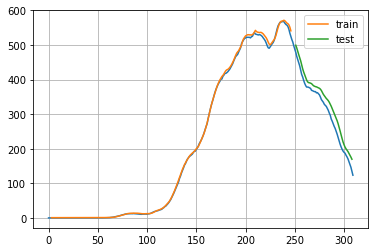

In [101]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.legend()
plt.show()

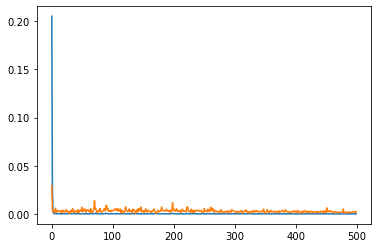

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])